<a href="https://colab.research.google.com/github/sdogbo/PCDS_assignments/blob/main/pcds4b_deferred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## dask <code>compute()</code> Deferred Computing

We're going to build a somewhat interesting workload and then run it a couple of different ways.  Let's start by loading the NYC flight data.

This exercise will reinforce dask dataframe programming concepts by building a set of analyses. We will then use these type of `groupby` and aggregate queries to look at execution properties.

Code that you need to write is indicated with #TODO. I've left the output of the reference implementation in the cells so that you can refer to it for correctness.  You can refer to the read-only shared version for this output.

In [ ]:
%pip install fsspec
%pip install gcsfs

Read in the NYC Flights data from Google cloud storage and then print the dataframe metadata.

In [ ]:
import dask.dataframe as dd

df = dd.read_csv('gcs://nycflights/*.csv',
                 storage_options={'token': 'anon'},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,string,int64,string,float64,float64,float64,float64,float64,string,string,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Let's build a set of queries around the performance of particular planes, identified by tail number.  The pattern will be to <code>groupby('TailNum') and then compute statistics.

__Query__: What is the average departure delay 'DepDelay' for each plane?

In [ ]:
#TODO
df_delay

TailNum
EI-BWD    11.213501
EI-CAL    23.846154
EI-CAM    26.611511
EI-CIW    12.918182
N050AA     9.180180
            ...    
N976TW    -2.294118
N978TW     0.000000
N979TW     5.250000
N980TW     3.428571
N982TW    14.000000
Name: DepDelay, Length: 3712, dtype: float64

Interesting, some planes were early, lets plot a histrogram of the distribution with 1000 bins.

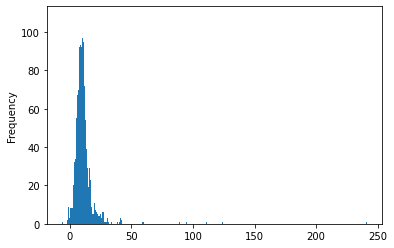

In [ ]:
%matplotlib inline
#TODO

OK, we have very few chronically bad planes.  Let's find those that are 30 (or more) minutes late on average.

In [ ]:
import numpy as np
lateplanes = #TODO
print(np.sort(lateplanes))

['N101UW' 'N102UW' 'N104UW' 'N106UW' 'N128AW' 'N133JC' 'N133TW' 'N134TW'
 'N14249' 'N144JC' 'N147US' 'N151AW' 'N151UA' 'N152UA' 'N153US' 'N154AA'
 'N154AW' 'N155US' 'N156AW' 'N158AW' 'N161US' 'N168AW' 'N169AW' 'N17010'
 'N17011' 'N1738D' 'N1739D' 'N174AW' 'N174GM' 'N174UA' 'N175UA' 'N17789'
 'N1854U' 'N195UA' 'N199UA' 'N224DA' 'N224NW' 'N225NW' 'N235NW' 'N303TW'
 'N304AW' 'N305AW' 'N305TW' 'N307TW' 'N322AW' 'N328AW' 'N33021' 'N3310L'
 'N331AW' 'N375DA' 'N376DL' 'N379DL' 'N382DA' 'N53110' 'N53116' 'N534TW'
 'N6700' 'N701UW' 'N706UW' 'N708UW' 'N713DA' 'N713UW' 'N716DA' 'N719DA'
 'N724DA' 'N727UW' 'N733DS' 'N735D' 'N737D' 'N760DH' 'N78019' 'N787DL'
 'N789DL' 'N802DE' 'N805DE' 'N817AA' 'N8911E' 'N93104' 'N93107' 'N93108'
 'N93109' 'N93119' 'N96S' 'N971Z' 'N976UA' 'N993UA' 'NEIDLA' 'UNKNOW']


OK, this is a hard query.
Build a dataframe that is a subset all the data associated with the late planes.  There are many ways to solve this problem. I would recommend looking at the `isin()` function in dask.

In [ ]:
df_late = #TODO
df_late

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
8,1995-01-09,1,NaN,1950,NaN,2337,CO,401,UNKNOW,NaN,...,42.0,NaN,NaN,EWR,PHX,2133.0,8.0,33.0,True,0
39,1995-01-18,3,NaN,1640,NaN,2002,CO,446,UNKNOW,NaN,...,56.0,NaN,NaN,EWR,PHX,2133.0,6.0,20.0,True,0
248,1995-01-11,3,NaN,1815,NaN,2202,TW,731,UNKNOW,NaN,...,124.0,NaN,NaN,JFK,PHX,2153.0,10.0,34.0,True,0
276,1995-01-09,1,NaN,1900,NaN,2042,CO,633,UNKNOW,NaN,...,134.0,NaN,NaN,EWR,PIT,319.0,5.0,18.0,True,0
285,1995-01-09,1,NaN,1500,NaN,1634,CO,663,UNKNOW,NaN,...,154.0,NaN,NaN,EWR,PIT,319.0,4.0,11.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,True,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,True,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,True,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,True,0


Double check that the planes indexes in `df_late` match the answer to the `lateplanes` query.

In [ ]:
import numpy as np
latelist = #TODO
print(np.sort(latelist))

['N101UW' 'N102UW' 'N104UW' 'N106UW' 'N128AW' 'N133JC' 'N133TW' 'N134TW'
 'N14249' 'N144JC' 'N147US' 'N151AW' 'N151UA' 'N152UA' 'N153US' 'N154AA'
 'N154AW' 'N155US' 'N156AW' 'N158AW' 'N161US' 'N168AW' 'N169AW' 'N17010'
 'N17011' 'N1738D' 'N1739D' 'N174AW' 'N174GM' 'N174UA' 'N175UA' 'N17789'
 'N1854U' 'N195UA' 'N199UA' 'N224DA' 'N224NW' 'N225NW' 'N235NW' 'N303TW'
 'N304AW' 'N305AW' 'N305TW' 'N307TW' 'N322AW' 'N328AW' 'N33021' 'N3310L'
 'N331AW' 'N375DA' 'N376DL' 'N379DL' 'N382DA' 'N53110' 'N53116' 'N534TW'
 'N6700' 'N701UW' 'N706UW' 'N708UW' 'N713DA' 'N713UW' 'N716DA' 'N719DA'
 'N724DA' 'N727UW' 'N733DS' 'N735D' 'N737D' 'N760DH' 'N78019' 'N787DL'
 'N789DL' 'N802DE' 'N805DE' 'N817AA' 'N8911E' 'N93104' 'N93107' 'N93108'
 'N93109' 'N93119' 'N96S' 'N971Z' 'N976UA' 'N993UA' 'NEIDLA' 'UNKNOW']


Now, let's get a sense of what airports these planes fly out of.  For the planes in the late_list, let's find out the total delay at these airports, the average delay by airport and the total number of flights at each airport.

In [ ]:
#TODO total DepDelay for planes by Origin airport

Origin
EWR    16982.0
JFK    61684.0
LGA    27789.0
Name: DepDelay, dtype: float64

In [ ]:
#TODO average DepDelay for planes by Origin airport

Origin
EWR    42.992405
JFK    41.763033
LGA    36.042802
Name: DepDelay, dtype: float64

In [ ]:
#TODO number of late flights by Origin airport

Origin
EWR    18723
JFK     4564
LGA    13056
Name: Origin, dtype: int64

## Deferred computing

We are going to show the value of deferred computation by timing the following
queries in two different ways:

```python
df1 = df.groupby(['Origin','TailNum']).DepDelay.mean()
df2 = df.groupby(['TailNum','Origin']).DepDelay.mean()
df3 = df.groupby(['Origin','TailNum']).DepDelay.max()
df4 = df.groupby(['TailNum','Origin']).DepDelay.max()
```

 1. In one cell, add these lines and then call `compute()` on every step.
 2. In the next cell, add the lines and only call compute at the end.

 First reload the data:

In [ ]:
import dask.dataframe as dd

df = dd.read_csv('gcs://nycflights/*.csv',
                 storage_options={'token': 'anon'},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,string,int64,string,float64,float64,float64,float64,float64,string,string,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Run the workload calling `compute()` on every line.

In [ ]:
%%time

#TODO

Load the data again to make sure that intermediate results are not cached and run the entire workload calling `compute()` just once.

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('gs://nycflights/*.csv',
                 storage_options={'token': 'anon'},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [ ]:
%%time

#TODO



### Outcomes
* Wrestled with dataframes syntax and concepts.  Good for you.
* Witnessed the benefit of deferred computation.

### Questions

1. On computational reuse in execution graphs:

  a. How much faster is it to defer the computation to the end versus calling `compute()` on every line?

  b. What computations are shared in the workflow?  Be specific, i.e. identify the code.

  c. Explain the speedup realized in 1(a). Why is it faster?
